In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
uci=pd.read_csv('/content/Updated_UCI_Credit_Card.csv')

In [ ]:
uci.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Adjusted_Credit_Score
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,800.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,600.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,700.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,700.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,700.0


In [ ]:
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
uci.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
Adjusted_Credit_Score         0
dtype: int64

In [ ]:
uci.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Adjusted_Credit_Score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,695.920500
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,110.086224
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,700.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,700.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,760.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,852.000000


In [ ]:
uci['creditscore']=uci['Adjusted_Credit_Score']
uci.drop('Adjusted_Credit_Score',axis=1,inplace=True)


In [ ]:
uci

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,creditscore
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,800.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,600.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,700.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,700.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,700.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,720.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,720.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,725.0


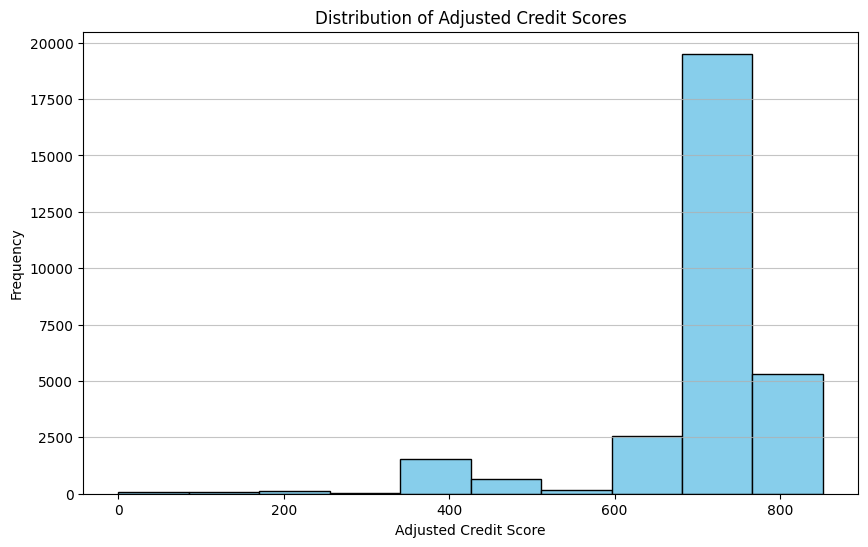

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(uci['creditscore'],  color='skyblue', edgecolor='black')
plt.title('Distribution of Adjusted Credit Scores')
plt.xlabel('Adjusted Credit Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:


uci.drop(['PAY_0', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3'], axis=1, inplace=True)


In [ ]:
uci.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_4,PAY_5,PAY_6,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,creditscore
0,1,20000.0,2,2,1,24,-1,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,1,800.0
1,2,120000.0,2,2,2,26,0,0,2,3272.0,3455.0,3261.0,1000.0,0.0,2000.0,1,600.0
2,3,90000.0,2,2,2,34,0,0,0,14331.0,14948.0,15549.0,1000.0,1000.0,5000.0,0,700.0
3,4,50000.0,2,2,1,37,0,0,0,28314.0,28959.0,29547.0,1100.0,1069.0,1000.0,0,700.0
4,5,50000.0,1,2,1,57,0,0,0,20940.0,19146.0,19131.0,9000.0,689.0,679.0,0,700.0


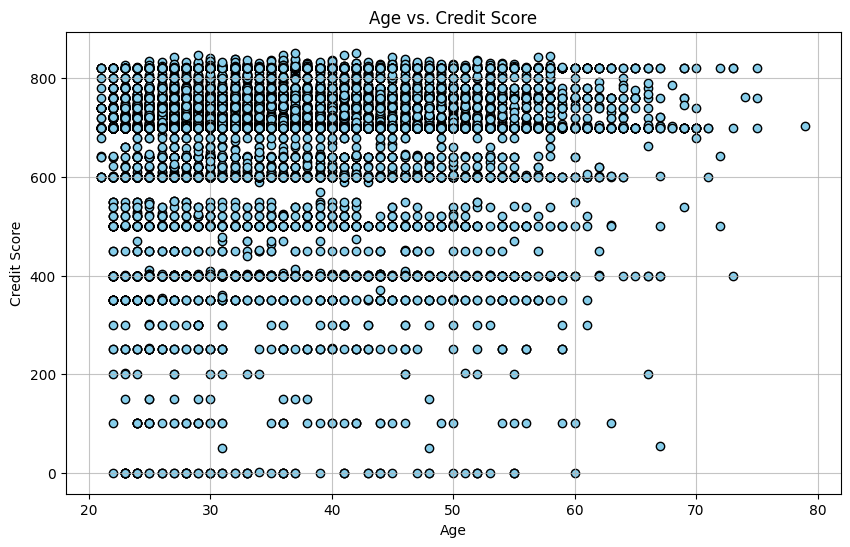

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(uci['AGE'], uci['creditscore'], color='skyblue', edgecolor='black')
plt.title('Age vs. Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(alpha=0.75)
plt.show()


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(uci.drop('creditscore', axis=1), uci['creditscore'], test_size=0.2, random_state=42)


In [ ]:
X_train = X_train[['PAY_4', 'PAY_5', 'PAY_6']]
X_test = X_test[['PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
750/750 [==============================] - 4s 3ms/step - loss: 457460.1875
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 405021.0938
Epoch 3/100
750/750 [==============================] - 3s 5ms/step - loss: 359890.1250
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 318483.0625
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 280283.8125
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 245018.7500
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 212546.0469
Epoch 8/100
750/750 [==============================] - 2s 3ms/step - loss: 182757.2656
Epoch 9/100
750/750 [==============================] - 3s 4ms/step - loss: 155569.1406
Epoch 10/100
750/750 [==============================] - 2s 2ms/step - loss: 130953.1953
Epoch 11/100
750/750 [==============================] - 2s 2ms/step - loss: 108829.8359
Epoch 12/100
750/750 [===================

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


188/188 [==============================] - 2s 6ms/step
Mean Squared Error: 9.402287733420778
R-squared: 0.9992228803743575


In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
model.predict([[-1,0,-1]])

1/1 [==============================] - 0s 40ms/step


array([[741.4847]], dtype=float32)

In [25]:
# prompt: train the model using linear regression taking only that 3 inputs

from sklearn.linear_model import LinearRegression

# Extract the three input features from the data
X_train_linear = X_train[['PAY_4', 'PAY_5', 'PAY_6']]
X_test_linear = X_test[['PAY_4', 'PAY_5', 'PAY_6']]

# Create a linear regression model
model_linear = LinearRegression()

# Train the model on the training data
model_linear.fit(X_train_linear, y_train)

# Evaluate the model on the test data
y_pred_linear = model_linear.predict(X_test_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the results
print("Linear Regression:")
print("- Mean Squared Error:", mse_linear)
print("- R-squared:", r2_linear)


Linear Regression:
- Mean Squared Error: 1225.9362535069292
- R-squared: 0.8986736899147975


In [26]:
model_linear.predict([[-1,0,-1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([735.81941161])

In [27]:
# prompt: export this model using pkl

import pickle

with open('model_linear.pkl', 'wb') as file:
  pickle.dump(model_linear, file)
